# 7. Hafta Lab-1: Yapay Sinir Ağları
## SİB 552: Siber Güvenlik İçin Veri Madenciliği
## Gebze Teknik Üniversitesi - Siber Güvenlik Yüksek Lisans Programı
### Dr. Ferhat Özgür Çatak

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Embedding, Input
from keras.utils import plot_model

Using TensorFlow backend.


In [3]:
# veri kumesini oku
kolon_adlari = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
'dst_host_srv_rerror_rate','label']

verikumesi = pd.read_csv("kddcup99.tar.gz",compression="gzip", names=kolon_adlari, 
low_memory=False, skiprows=1)

In [4]:
# ilgili kolonlari sec
secilecek_kolonlar = ['duration','src_bytes','dst_bytes','wrong_fragment','urgent','hot','num_failed_logins',
'num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells',
'num_access_files','num_outbound_cmds','count','srv_count','serror_rate','srv_serror_rate',
'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
'dst_host_srv_rerror_rate']
X = verikumesi[secilecek_kolonlar].as_matrix()
y = verikumesi['label'].apply(lambda d:0 if d == 'normal.' else 1).as_matrix()

# Egitim ve test veri kumeleri olustur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

c:\users\ozgur\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
c:\users\ozgur\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


### Yapay sinir ağı modeli oluştur

In [5]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='sigmoid', kernel_initializer='uniform' ))
model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
X_train.shape[1]

Instructions for updating:
Colocations handled automatically by placer.


34

### Modeli compile edelim

In [6]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

### Modeli inceleyelim.

In [7]:
#plot_model(model, show_shapes=True,to_file="binary.png")
#Image("binary.png")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                350       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


### Modeli eğitelim

In [8]:
history = model.fit(X_train, y_train, epochs=50, batch_size=1024, verbose=1, validation_split=0.33)

Instructions for updating:
Use tf.cast instead.
Train on 221765 samples, validate on 109228 samples
Epoch 1/50
221765/221765 [==============================] - 1s 3us/step - loss: 0.4094 - acc: 0.8030 - val_loss: 0.2796 - val_acc: 0.8028
Epoch 2/50
221765/221765 [==============================] - 0s 2us/step - loss: 0.2383 - acc: 0.8030 - val_loss: 0.2090 - val_acc: 0.8028
Epoch 3/50
221765/221765 [==============================] - 0s 2us/step - loss: 0.1907 - acc: 0.8708 - val_loss: 0.1748 - val_acc: 0.9866
Epoch 4/50
221765/221765 [==============================] - 0s 2us/step - loss: 0.1618 - acc: 0.9890 - val_loss: 0.1500 - val_acc: 0.9899
Epoch 5/50
221765/221765 [==============================] - 0s 2us/step - loss: 0.1397 - acc: 0.9898 - val_loss: 0.1301 - val_acc: 0.9905
Epoch 6/50
221765/221765 [==============================] - 0s 2us/step - loss: 0.1217 - acc: 0.9900 - val_loss: 0.1138 - val_acc: 0.9901
Epoch 7/50
221765/221765 [==============================] - 0s 2us/step 

### Sınıflandırma modelinin performansına bakalım.

In [9]:
y_pred = model.predict_classes(X_test)

In [10]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98     32061\n           1       1.00      0.99      1.00    130966\n\n   micro avg       0.99      0.99      0.99    163027\n   macro avg       0.98      0.99      0.99    163027\nweighted avg       0.99      0.99      0.99    163027\n'

In [11]:
accuracy_score(y_test, y_pred)

0.993301723027474

In [12]:
confusion_matrix(y_test, y_pred)

array([[ 31976,     85],
       [  1007, 129959]], dtype=int64)

### Eğitim tarihçesini inceliyelim.

In [13]:
y_hat = model.predict(X_test)

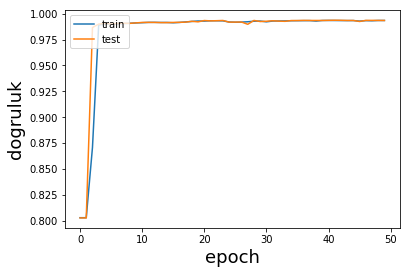

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('dogruluk', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Kayıp fonksiyonunun değişimi

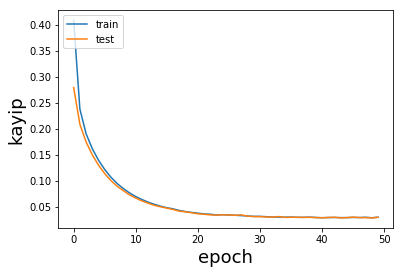

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()

## Model karmaşıklığını neuron ekleyerek artıralım

In [16]:
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='sigmoid', kernel_initializer='uniform' ))
model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=25, batch_size=1024, verbose=1, validation_split=0.33)

Train on 221765 samples, validate on 109228 samples
Epoch 1/25
221765/221765 [==============================] - 1s 3us/step - loss: 0.1236 - acc: 0.9779 - val_loss: 0.0407 - val_acc: 0.9881
Epoch 2/25
221765/221765 [==============================] - 0s 2us/step - loss: 0.0336 - acc: 0.9888 - val_loss: 0.0290 - val_acc: 0.9900
Epoch 3/25
221765/221765 [==============================] - 0s 2us/step - loss: 0.0268 - acc: 0.9906 - val_loss: 0.0251 - val_acc: 0.9910
Epoch 4/25
221765/221765 [==============================] - 1s 3us/step - loss: 0.0234 - acc: 0.9916 - val_loss: 0.0221 - val_acc: 0.9925
Epoch 5/25
221765/221765 [==============================] - 1s 2us/step - loss: 0.0207 - acc: 0.9924 - val_loss: 0.0195 - val_acc: 0.9926
Epoch 6/25
221765/221765 [==============================] - 0s 2us/step - loss: 0.0193 - acc: 0.9927 - val_loss: 0.0195 - val_acc: 0.9929
Epoch 7/25
221765/221765 [==============================] - 0s 2us/step - loss: 0.0189 - acc: 0.9929 - val_loss: 0.0186 

### Sınıflandırma performansı

In [17]:
y_hat = model.predict(X_test)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98     32061\n           1       1.00      0.99      1.00    130966\n\n   micro avg       0.99      0.99      0.99    163027\n   macro avg       0.98      0.99      0.99    163027\nweighted avg       0.99      0.99      0.99    163027\n'

In [18]:
accuracy_score(y_test, y_pred)

0.993301723027474

In [19]:
confusion_matrix(y_test, y_pred)

array([[ 31976,     85],
       [  1007, 129959]], dtype=int64)

### Eğitim tarihçesi

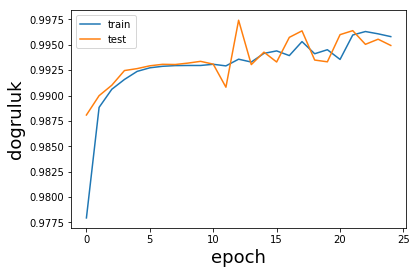

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('dogruluk', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Kayıp fonksiyon değişimi

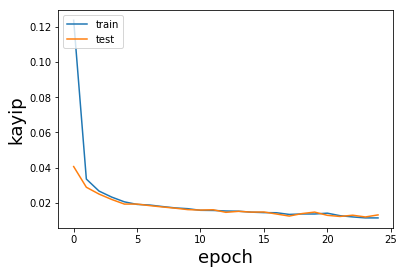

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()